**Loading the Dataset**

In [3]:
import pandas as pd
df=pd.read_csv('heart.csv')
print(df.head())
print(df.info())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5 

**Data Preprocessing**

In [4]:
# Check the unique values in the 'thal' column to understand how to handle the error values
df['thal'].value_counts()


thal
2    166
3    117
1     18
0      2
Name: count, dtype: int64

In [5]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Replace '0' in 'thal' with the mode of 'thal'
df['thal'].replace(0, 2, inplace=True)

# Identify categorical and numerical columns for encoding and normalization
categorical_features = ['cp', 'restecg', 'slope', 'thal']
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

C:\Users\Al-Hussain Com\AppData\Local\Temp\ipykernel_21212\4079391744.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['thal'].replace(0, 2, inplace=True)


In [6]:
df['thal'] = df['thal'].replace(0, 2)


In [7]:
# Define categorical and numerical columns for encoding and normalization
categorical_features = ['cp', 'restecg', 'slope', 'thal']
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Define the ColumnTransformer to apply transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [8]:
# Remove rows where 'ca' is equal to 4 because vessel was only 0-3, '4' is a mistake in original dataset
data_cleaned = df[df['ca'] != 4]

# Display the new shape of the dataset to confirm rows have been removed
data_cleaned.shape


(298, 14)

In [9]:
data_cleaned.head

<bound method NDFrame.head of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1      

**Separating Features and Target**

In [10]:
# Fit and transform the data
X = preprocessor.fit_transform(data_cleaned.drop('target', axis=1))
y = data_cleaned['target'].values

In [11]:
X.shape

(298, 18)

In [28]:
# Count the occurrences of 0's and 1's in the target variable of the entire dataset
target_counts = data_cleaned['target'].value_counts()

# Display the counts
target_counts


target
1    161
0    137
Name: count, dtype: int64

**EDA**

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

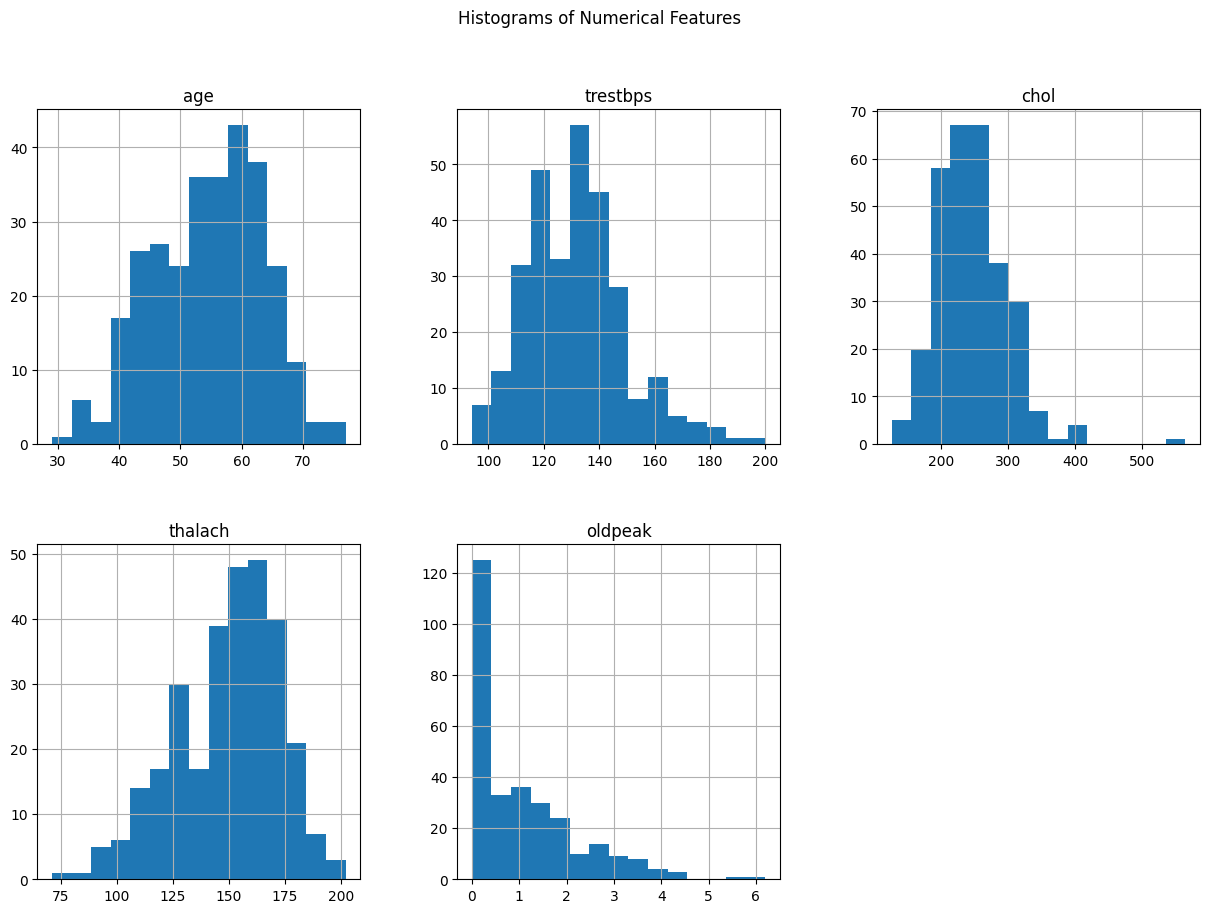

In [13]:
# Perform EDA on the cleaned data
# Histograms for numerical features
data_cleaned[numerical_features].hist(bins=15, figsize=(15, 10), layout=(2, 3))
plt.suptitle('Histograms of Numerical Features')
plt.show()

**key observations:**

**Age:**

The distribution of age is somewhat right-skewed, with a higher concentration of patients in the middle age range (50s and 60s). This suggests a prevalence of heart disease screening or incidents among this age group.

**Resting Blood Pressure (trestbps):**

The distribution is approximately normally distributed with a peak around 120 to 140 mm Hg. This indicates that most patients have blood pressure within this range, which is typically considered normal to slightly elevated.

**Cholesterol (chol):**

The cholesterol levels are also somewhat right-skewed, with most values concentrated between 200 and 300 mg/dl. High cholesterol levels (above 240 mg/dl) are prevalent, indicating a risk factor for heart disease among the patients.

**Maximum Heart Rate Achieved (thalach):**

The distribution is left-skewed with most individuals achieving a peak heart rate between 150 to 170 beats per minute during stress. The decline in maximum heart rate as it approaches higher values suggests that fewer individuals achieve very high heart rates, which could be related to age or heart condition.

**ST Depression Induced by Exercise Relative to Rest (oldpeak):**

The distribution is heavily skewed towards lower values, with a large number of observations close to 0. Higher values of ST depression are less common but could indicate more severe exercise-induced cardiac stress.

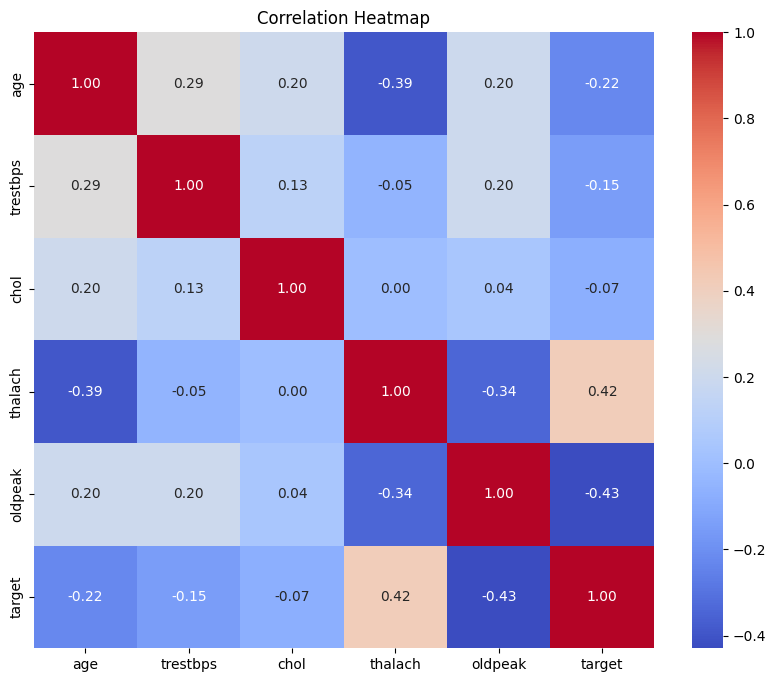

In [14]:
# Heatmap for correlations
plt.figure(figsize=(10, 8))
sns.heatmap(data_cleaned[numerical_features + ['target']].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Key Observations:**
**Age:**
Positively correlated with trestbps (resting blood pressure) and chol (cholesterol), suggesting that these parameters tend to increase with age.
Negatively correlated with thalach (maximum heart rate achieved), meaning older individuals tend to have lower peak heart rates.
**Trestbps and Chol:**
Mild positive correlation with each other, suggesting that individuals with higher blood pressure may also have higher cholesterol levels.
**Thalach (Maximum Heart Rate):**
Negatively correlated with age and oldpeak (ST depression), suggesting that younger individuals and those with less exercise-induced ST depression achieve higher maximum heart rates.
Positively correlated with the target (presence of heart disease), indicating that higher maximum heart rates are associated with a greater likelihood of having heart disease in this dataset.
**Oldpeak (ST Depression):**
Positively correlated with age and negatively correlated with thalach, suggesting that older age and lower heart rates are associated with greater exercise-induced ST depression.
Strong negative correlation with the target, indicating that higher values of ST depression are linked with a lower likelihood of having heart disease, which could be indicative of more severe symptoms or advanced disease progression.
**Target (Heart Disease):**
Correlations with age, thalach, and oldpeak are notably significant in understanding how the likelihood of heart disease is associated with these clinical measurements.

**Training Using Logistic Regression:**

In [15]:
#Importing Necessary Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize and train the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [16]:
y_pred = log_reg.predict(X_test)


**Accuracy Checking**

In [26]:

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy,class_report

(0.7833333333333333,
 '              precision    recall  f1-score   support\n\n           0       0.73      0.70      0.71        23\n           1       0.82      0.84      0.83        37\n\n    accuracy                           0.78        60\n   macro avg       0.77      0.77      0.77        60\nweighted avg       0.78      0.78      0.78        60\n')

In [27]:
# Calculate the metrics for the provided predictions
accuracy = accuracy_score(y_test, y_pred_optimized)
conf_matrix = confusion_matrix(y_test, y_pred_optimized)
class_report = classification_report(y_test, y_pred_optimized)

# Extracting F1-Scores from the classification report
from sklearn.metrics import precision_recall_fscore_support

# Get scores for each class
scores = precision_recall_fscore_support(y_test, y_pred_optimized)
f1_scores = scores[2]  # F1-Scores are at index 2

# Creating a table with F1-Scores for each class
import pandas as pd

# Class labels can vary, assuming binary classification here for simplicity
class_labels = ['No Disease', 'Disease']
f1_score_table = pd.DataFrame({
    'Class': class_labels,
    'F1-Score': f1_scores
})

f1_score_table


,Class,F1-Score
0,No Disease,0.711111
1,Disease,0.826667


**Confusion matrix**

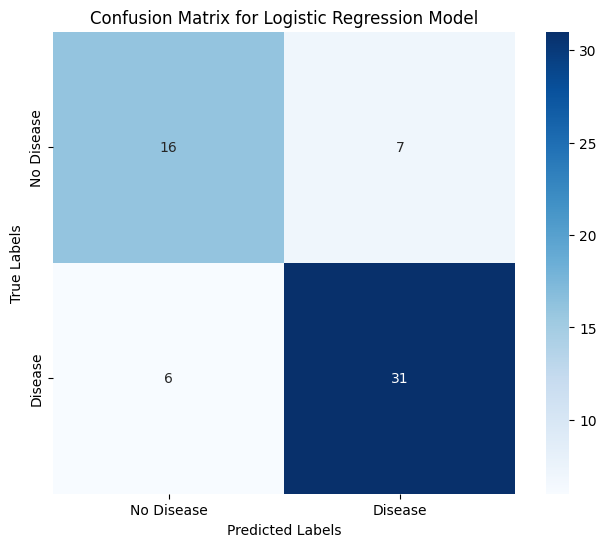

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", square=True,
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()


**Using GridSearchCV for Better Regression**

In [18]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],       # Type of regularization
    'solver': ['liblinear', 'saga'] # Solvers that support l1 and l2 penalties
}

# Create the grid search object
grid_search = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score


Fitting 5 folds for each of 20 candidates, totalling 100 fits


({'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}, 0.8194148936170211)

In [29]:
# Retrain the logistic regression model using the best parameters from the GridSearchCV
optimized_log_reg = LogisticRegression(C=0.1, penalty='l2', solver='saga', max_iter=10000)
optimized_log_reg.fit(X_train, y_train)

# Predict on the test set using the optimized model
y_pred_optimized = optimized_log_reg.predict(X_test)

# Evaluate the optimized model
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
conf_matrix_optimized = confusion_matrix(y_test, y_pred_optimized)
class_report_optimized = classification_report(y_test, y_pred_optimized)

accuracy_optimized, conf_matrix_optimized, class_report_optimized


(0.7833333333333333,
 array([[16,  7],
        [ 6, 31]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.73      0.70      0.71        23\n           1       0.82      0.84      0.83        37\n\n    accuracy                           0.78        60\n   macro avg       0.77      0.77      0.77        60\nweighted avg       0.78      0.78      0.78        60\n')

In [30]:

# Extracting F1-Scores from the classification report for the optimized model
scores_optimized = precision_recall_fscore_support(y_test, y_pred_optimized)
f1_scores_optimized = scores_optimized[2]  # F1-Scores are at index 2

# Creating a table with F1-Scores for the optimized model
f1_score_table_optimized = pd.DataFrame({
    'Class': class_labels,
    'F1-Score': f1_scores_optimized
})

f1_score_table_optimized


,Class,F1-Score
0,No Disease,0.711111
1,Disease,0.826667


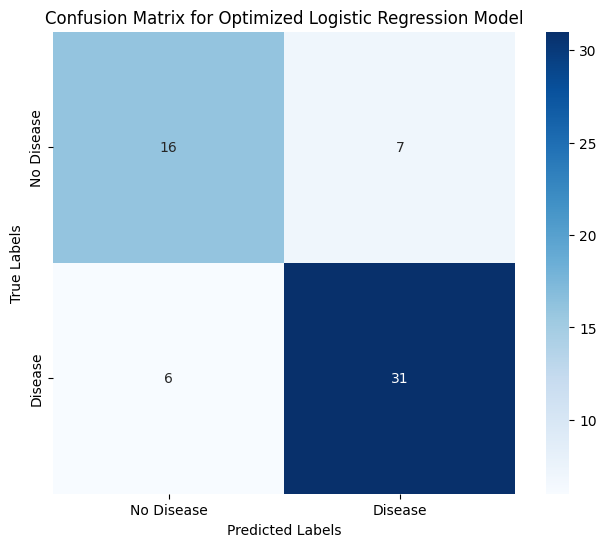

In [31]:
# Create a confusion matrix heatmap for the optimized model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_optimized, annot=True, fmt="d", cmap="Blues", square=True,
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Optimized Logistic Regression Model')
plt.show()


**Calculating the Loss**

In [32]:
import numpy as np

def binary_cross_entropy_loss(y_true, y_pred_probs):
    """
    Calculate the binary cross-entropy loss.
    
    Parameters:
    - y_true: array, true labels (0 or 1)
    - y_pred_probs: array, predicted probabilities for the positive class (between 0 and 1)

    Returns:
    - loss: float, the binary cross-entropy loss
    """
    epsilon = 1e-15  # A small number to avoid log(0)
    y_pred_probs = np.clip(y_pred_probs, epsilon, 1 - epsilon)  # Clip predictions to avoid log(0)
    loss = -np.mean(y_true * np.log(y_pred_probs) + (1 - y_true) * np.log(1 - y_pred_probs))
    return loss

# Get predicted probabilities for the positive class (class 1 - 'Disease')
y_pred_probs = optimized_log_reg.predict_proba(X_test)[:, 1]

# Calculate the binary cross-entropy loss
loss = binary_cross_entropy_loss(y_test, y_pred_probs)
print(f"Binary Cross-Entropy Loss: {loss}")


Binary Cross-Entropy Loss: 0.47794706190651653


**Using Gradient Descent**

In [39]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def binary_cross_entropy_loss(y_true, y_pred_probs):
    epsilon = 1e-15  # Use a small epsilon to avoid log(0)
    y_pred_probs = np.clip(y_pred_probs, epsilon, 1 - epsilon)  # Clip predictions to avoid log(0) errors
    loss = -np.mean(y_true * np.log(y_pred_probs) + (1 - y_true) * np.log(1 - y_pred_probs))
    return loss

def compute_gradient(X, y, weights):
    predictions = sigmoid(X @ weights)
    errors = predictions - y
    gradient = X.T @ errors / len(y)
    return gradient

def gradient_descent(X, y, weights, learning_rate, iterations):
    loss_history = []
    for i in range(iterations):
        gradient = compute_gradient(X, y, weights)
        weights -= learning_rate * gradient
        # Calculate and record the loss
        loss = binary_cross_entropy_loss(y, sigmoid(X @ weights))
        loss_history.append(loss)
        if i % 100 == 0:
            print(f'Iteration {i}: Loss {loss}')
    return weights, loss_history

learning_rate = 0.01  # Lower learning rate
iterations = 5000    # Increased number of iterations for more gradual convergence

weights = np.zeros(X_train_bias.shape[1])

optimized_weights, loss_history = gradient_descent(X_train_bias, y_train, weights, learning_rate, iterations)
final_predictions = sigmoid(X_test_bias @ optimized_weights)
final_loss = binary_cross_entropy_loss(y_test, final_predictions)

print(f"Final Loss on Test Set: {final_loss}")


Iteration 0: Loss 0.6910910788560585
Iteration 100: Loss 0.5592807783953718
Iteration 200: Loss 0.5016257006325607
Iteration 300: Loss 0.47074402228071494
Iteration 400: Loss 0.4515599467238875
Iteration 500: Loss 0.4383774755349665
Iteration 600: Loss 0.42867080742421876
Iteration 700: Loss 0.4211711164291456
Iteration 800: Loss 0.4151753983487826
Iteration 900: Loss 0.4102620451741712
Iteration 1000: Loss 0.406161135003572
Iteration 1100: Loss 0.4026902045539041
Iteration 1200: Loss 0.39972021349999715
Iteration 1300: Loss 0.3971564372873197
Iteration 1400: Loss 0.3949271859923118
Iteration 1500: Loss 0.3929768372216891
Iteration 1600: Loss 0.39126135474757096
Iteration 1700: Loss 0.3897452977825726
Iteration 1800: Loss 0.3883997575417354
Iteration 1900: Loss 0.38720089059086904
Iteration 2000: Loss 0.386128848603359
Iteration 2100: Loss 0.38516697923630133
Iteration 2200: Loss 0.38430121747236573
Iteration 2300: Loss 0.383519614056625
Iteration 2400: Loss 0.382811964781995
Iteration